# Numeric integration 

Integration is simply adding up the area under the curve. An integral in two dimensions will add up the area under a surface. If you have an analytic equation that can be integrated to create another analytic equation (think the integral of a sine function is a cosine function) then you can just evaluate that analytic equation; unfortunately, there are very few "real world" equations that we can integrate in this way. So we turn to numerical integration.

There are (broadly) two ways to integrate numerically. One is to chop up the domain into chunks and approximate with rectangles or trapezoids (or something fancier). The other is to sample the integral at some random points and see if the points are under the curve (or not).

We'll do one each of these in this tutorial

Slides: https://docs.google.com/presentation/d/1-I407aSQVEo_WJPGlZlG3Dh4AJ5vZa0rl_pXxELR2ic/edit?usp=sharing

In [3]:
# Our usual numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# We'll use fmin bound (which is a version of fmin that lets you set bounds on the search area)
from scipy.optimize import fminbound
# All of the numerical integration techniques live in scipy.integrate
from scipy.integrate import quad


In [4]:
# A generic function that we want to find the area under the curve for
def my_func(x):
    """A quadratic function
    @param x the input x value
    @returns f(x)"""
    return (x-2)**2 - 3

# Trapz example

In this example, we "manually" chop of the function ourselves, and pass the samples to trapz to do the calculation.

Find the area under the curve from x = a to x = b

**trapz** wants either a **dx** value (spacing between the samples) OR actual **x** values (useful if the x values are not evenly spaced)

So pick some **x** values, evaluate the function at those **x** values **y = f(x)**, then send both the **y** and **x** values to **trapz** (note that **trapz** takes the **y** values then the **x** OR **d** values)

TODO Change the integration limits - what do you get when the curve crosses the y=0 line?

TODO What happens when you change the number of samples?

In [19]:
# Integration limits
a = -1
b = 3

# Get x values evenly spaced between a and b
xs = np.linspace(a, b, num=10)
# Evaluate function
ys = my_func(xs)

# Use trapz to get area - notice that y and x are swapped
area_under_curve = np.trapz(ys, xs)
print(area_under_curve)


-2.5349794238683128


## Let's plot and see if the area calculation is about right

Text(0.5, 1.0, 'Area under curve: box is 24.0, trapz -2.5350')

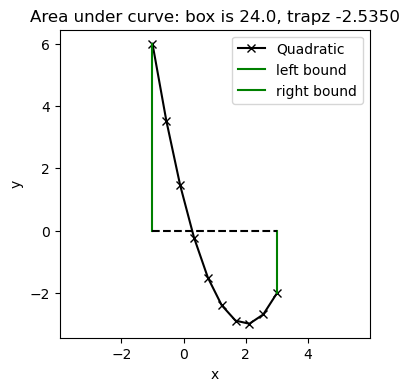

In [20]:
#  If you look at the wedge, it's about 1/2 of the square, so 1/2 6 is about right
#.   The 
fig, axs = plt.subplots(1, 1, figsize=(4, 4))
axs.plot(xs, ys, '-xk', label='Quadratic')

# Integration limits
axs.plot([a, a], [0, ys[0]], '-g', label='left bound')
axs.plot([b, b], [0, ys[-1]], '-g', label='right bound')
axs.plot([a, b], [0, 0], '--k')
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.legend()
axs.axis('equal')

axs.set_title(f"Area under curve: box is {(b-a) * np.max(ys)}, trapz {area_under_curve:0.4f}")

# Quad example

In this example, we pass the function itself in and let the **quad** function decide how many samples to use. This is, in general, better than **trapz**, because **quad** tries to find a balance between number of samples and accuracy.

Find the area under the curve from **x = a** to **x = b**

**quad** takes in a function and bounds **(a, b)**

TODO Change the integration limits - what do you get when the curve crosses the y=0 line?

TODO How many samples do you need in the **trapz** example above to get the same answer as **quad**?

In [25]:
# Integration limits
a = -1
b = 10
# quad will do the sampling for you
area_under_curve = quad(my_func, a, b)

## Plot

Text(0.5, 1.0, 'Area under curve using quad 146.6667')

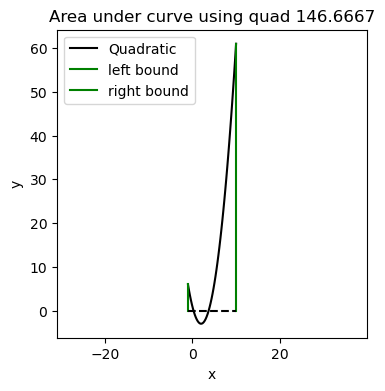

In [26]:
# We'll need to create samples to plot...
fig, axs = plt.subplots(1, 1, figsize=(4, 4))
axs.plot(np.linspace(a, b), my_func(np.linspace(a, b)), '-k', label='Quadratic')

# Plot the left/right boundaries with the max, min function values
axs.plot([a, a], [0, my_func(a)], '-g', label='left bound')
axs.plot([b, b], [0, my_func(b)], '-g', label='right bound')
axs.plot([a, b], [0, 0], '--k')

axs.set_xlabel('x')
axs.set_ylabel('y')
axs.axis('equal')
axs.legend()

# Quad returns two parameters; the one we want (the area) is the first one
axs.set_title(f"Area under curve using quad {area_under_curve[0]:0.4f}")

# Monte-carlo example

Find the area under the curve by estimating the number of points inside vs outside the box
- Build a box that encloses the curve (need to find the min and max values of the function over the interval [a,b])
- Generate samples in that box
- See if the samples are under the curve (or not). Somewhat complicated because it depends on if the curve is above or below the **y = 0** line

TODO Change the integration limits - what do you get when the curve crosses the y=0 line?

TODO Change the number of samples and/or run the code multiple times - how much does the answer vary?

In [33]:
# Integration limits - change this so the curve passes under the y = 0 line
a = -1
b = 10

# fminbound is like fmin, but it takes in boundaries to search over
# Notice the minus sign (-) in order to find the maximum
# Remember that fmin and fminbound returns the x value where the function is at a minimum
#   ... so to get the actual f(x) max/min you need to pass it back to my_func
largest_value_of_f = my_func(fminbound(lambda x : -my_func(x), a, b))
smallest_value_of_f = my_func(fminbound(lambda x : my_func(x), a, b))

# How to calculate the area of a rectangle
box_area = (b-a) * (largest_value_of_f - smallest_value_of_f)

In [36]:
# Generate 100 random samples in the box
n_samples = 1000
# x samples go between a and b
xs_samples = np.random.uniform(a, b, n_samples)
# y samples go between the two bounds on my_func
ys_samples = np.random.uniform(smallest_value_of_f, largest_value_of_f, n_samples)

# Now figure out which ones are less than my_func(x)
# I don't know why and and or don't work, so we'll use logical and & and logical or | and logical not ~
b_func_is_above_line = my_func(xs_samples) > 0
b_sample_is_above_line = ys_samples > 0
b_is_inside_above = b_func_is_above_line & b_sample_is_above_line & (ys_samples < my_func(xs_samples))
b_is_inside_below = ~b_func_is_above_line & ~b_sample_is_above_line & (ys_samples > my_func(xs_samples))
b_is_under = b_is_inside_above | b_is_inside_below

# Count how many are under versus over - that's an approximation of the percentage of the box
#  area that is inside the curve
area_under_curve = box_area * np.count_nonzero(b_is_under) / n_samples

## Let's plot and see if we got the box right and labeled the samples correctly

We'll draw the samples and color them as red dots or green +'s depending on if they are inside or outside

Text(0.5, 1.0, 'Area under curve using Monte-Carlo 151.3598, n 1000')

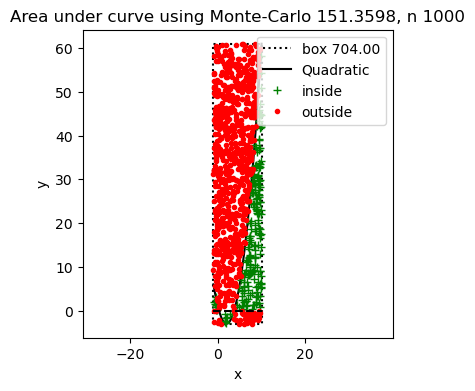

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))

# Draw the box
axs.plot([a, b, b, a, a],
         [smallest_value_of_f, smallest_value_of_f, largest_value_of_f, largest_value_of_f, smallest_value_of_f],
         ':k', label=f"box {box_area:0.2f}")

# Draw the function
axs.plot(np.linspace(a, b), my_func(np.linspace(a, b)), '-k', label='Quadratic')

# Plot samples inside versus outside
axs.plot(xs_samples[b_is_under], ys_samples[b_is_under], '+g', label="inside")
# I don't know why not b_is_under doesn't work, but logical_not with ~ does work
axs.plot(xs_samples[~b_is_under], ys_samples[~b_is_under], '.r', label="outside")

axs.plot([a, b], [0, 0], '--k')
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.axis('equal')
axs.legend()
# Quad returns several parameters; the one we want (the area) is the first one
axs.set_title(f"Area under curve using Monte-Carlo {area_under_curve:0.4f}, n {n_samples}")
